In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad
from scipy.special import gamma
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.optimize import curve_fit
import json
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[34.8783406 ]
 [56.03354459]
 [22.37575041]
 ...
 [25.04708582]
 [36.46407609]
 [27.91952622]]
[[0.03303513]
 [0.03241336]
 [0.04046476]
 ...
 [0.03129342]
 [0.04339195]
 [0.02184286]]


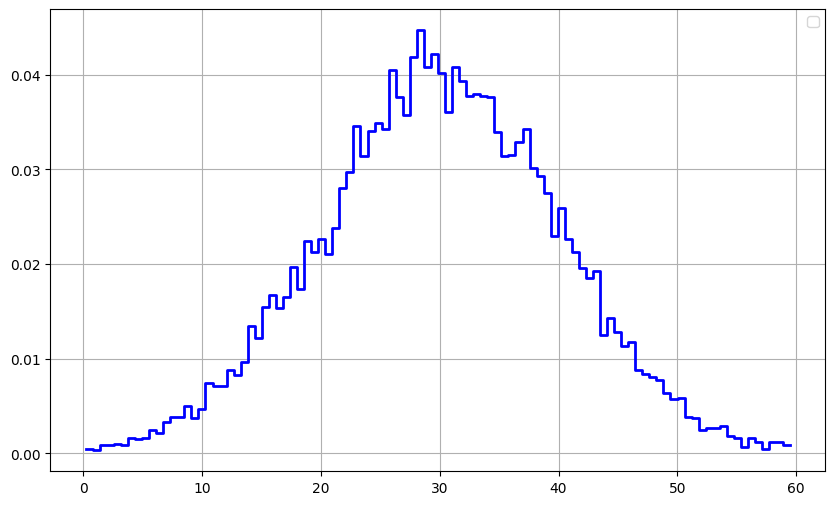

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


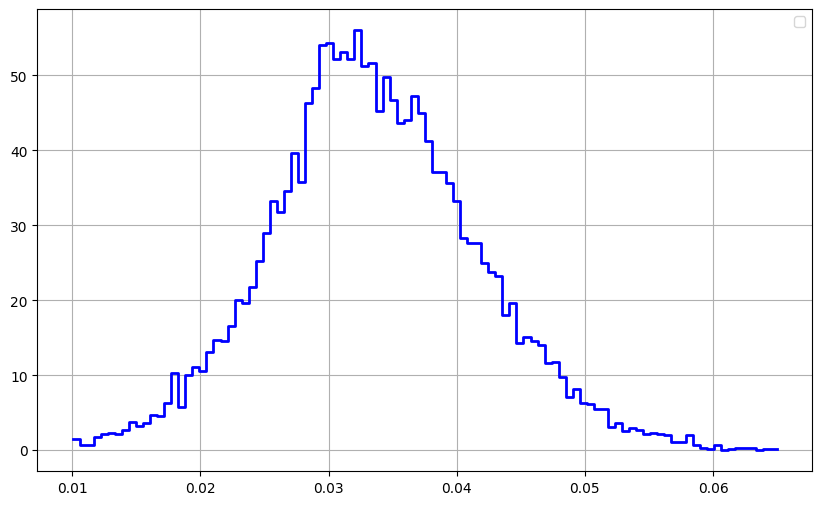

In [3]:
def g_x1(x):
    return (1/(np.sqrt(2*np.pi*10**2)))*np.exp(-(x-30)**2/(2* 10**2))

def g_x2(x):
    return (1/(np.sqrt(2*np.pi*0.01**2)))*np.exp(-(x-0.03)**2/(2* 0.01**2))

def comp_norm(g_x):
    integral, _= quad(lambda x: g_x(x), 0, np.inf)
    return integral

def g_x_norm(x, g_x):
    norm_factor= comp_norm(g_x)
    return g_x(x) / norm_factor  

def truncated_normal(mu, sigma, a, b, size=1):
    a, b= (a-mu)/sigma, (b-mu)/sigma  
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

# def sample_gx(mu, sigma, g_x, num_samples=10000):
#     samples= []
#     a, b= 1e-5, 50   
#     while len(samples) < num_samples:
#         x= truncated_normal(mu, sigma, a, b)
#         u= np.random.uniform(0, 1)
#         if u<= g_x_norm(x,g_x) / (1.25*truncnorm.pdf(x,(a-mu)/sigma,(b-mu)/sigma, loc=mu, scale=sigma)):  
#             samples.append(x)
#     return np.array(samples)

def sample_gx(mu, sigma, g_x, num_samples=10000):
    samples= []
    a, b = mu - 3*sigma, mu + 3*sigma  
    while len(samples) < num_samples:
        x= truncated_normal(mu, sigma, a, b)  
        u= np.random.uniform(0, 1)
        if u <= g_x_norm(x, g_x) / (1.5 * truncnorm.pdf(x, (a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)):  
            samples.append(x)  
    return np.array(samples)


def proposal_pdf(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

def trace_histogram(data, bins=100):
    counts, edges= np.histogram(data, bins=bins, density=True)
    left, right= edges[:-1], edges[1:]
    X= np.array([left, right]).T.flatten()
    Y= np.array([counts, counts]).T.flatten()
    return X, Y

def save_to_txt(filename, data):
    np.savetxt(filename, data, fmt="%.6f")

def main():
    B00 = sample_gx(30, 10, g_x1)
    nee = sample_gx(0.04, 0.01, g_x2)

    save_to_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_30/B00_samples.txt", B00)
    save_to_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_30/nee_samples.txt", nee)
    
    print(B00)
    print(nee)


    plt.figure(figsize=(10, 6))
    X_B_0, Y_B_0= trace_histogram(B00)
    BB_0= np.column_stack((X_B_0, Y_B_0))
    plt.plot(X_B_0, Y_B_0, color='b', linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    X_n_e, Y_n_e= trace_histogram(nee)
    nee_0= np.column_stack((X_n_e, Y_n_e))
    plt.plot(X_n_e, Y_n_e, color='b', linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad
from scipy.special import gamma
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.optimize import curve_fit
import json

In [2]:
def trans(r):
    return np.exp(-r/10)

def inverse_transform_sampling(n_samples=10000):
    u= np.random.uniform(0, 1, n_samples)  
    r_samples= (u * 23+2)  # (u * (R_max - R_min)+ R_min)
    x_samples= trans(r_samples)  
    return x_samples

def trace_histogram(data, bins=250, range=(-300, 300)):
    counts, edges = np.histogram(data, bins=bins, range=range, density=True)
    left, right = edges[:-1], edges[1:]
    X= np.array([left, right]).T.flatten()
    Y= np.array([counts, counts]).T.flatten()
    return X, Y

def run_simulation(i):
    
    n_samples = 10000
    u = np.random.uniform(0, 1, n_samples)
    samples_tani = 1*np.tan((np.pi * u) / 2)
    uu = np.random.uniform(0, 1, n_samples)
    samples_cos = 1* np.cos((np.pi * uu) / 0.5)

    
    samples_3= inverse_transform_sampling()

    B00 = load_from_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_28/B00_samples.txt")
    nee = load_from_txt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_28/nee_samples.txt")

    B_parallel_samples = - 0.81*500*samples_cos *samples_tani *samples_3*B00[i]*nee[i]
    X_BU, Y_BU= trace_histogram(B_parallel_samples)
    # print("X_BU:", X_BU)
    # print("Y_BU:", Y_BU)
    # plt.figure(figsize=(10, 6))
    # plt.plot(X_BU,Y_BU, color='r',linewidth=2)
    # plt.yscale("log")
    # plt.xlim(-200, 200)
    # plt.ylim(10**(-4), 10**(-1))
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    return X_BU, Y_BU

def load_from_txt(filename):
    return np.loadtxt(filename)

def save_to_txt(filename, data):
    np.savetxt(filename, data, fmt="%.6f")

def main():
    num_runs = 10000
    X_BU_combined = None
    Y_BU_combined = None

    for i in range(num_runs):
        # print(f"\n--- Run {i+1} ---")
        X_BU, Y_BU = run_simulation(i)

        if X_BU_combined is None:
            X_BU_combined = X_BU
            Y_BU_combined = Y_BU
        else:
            Y_BU_combined += Y_BU  
            
    Y_BU_combined /= num_runs
    
    np.savetxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_28/BU_combined_28_10.txt", np.column_stack((X_BU_combined, Y_BU_combined)), fmt="%.6f")
    
    # plt.figure(figsize=(10, 6))
    # plt.plot(X_BU_combined, Y_BU_combined, color='b', linewidth=2)
    # plt.yscale("log")
    # plt.xlim(-200, 200)
    # plt.ylim(1e-4, 1e-1)
    # plt.legend()
    # plt.grid(True)
    # plt.show()

if __name__ == "__main__":
    main()

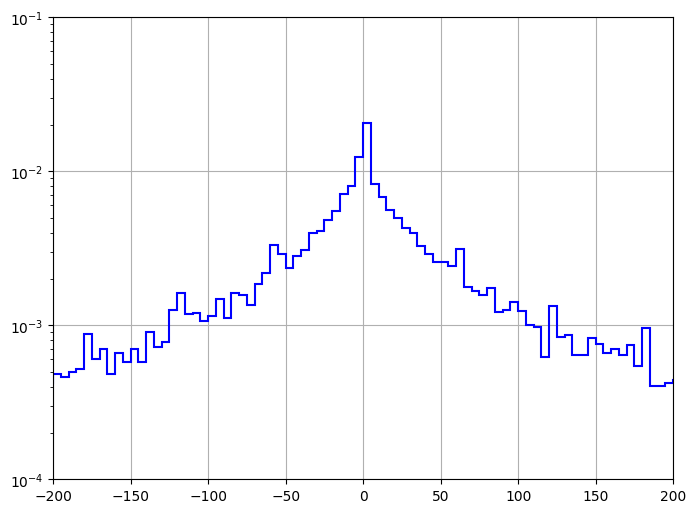

In [3]:
loaded_data = np.loadtxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_28/BU_combined_28_10.txt")
X_BU_l, Y_BU_l = loaded_data[:, 0], loaded_data[:, 1]
Y_BU_l_normalized = Y_BU_l / np.sum(Y_BU_l)

num_samples = 10000
sampled_data1 = np.random.choice(X_BU_l, size=num_samples, p=Y_BU_l_normalized)

bin_edges = np.arange(-300, 300, 5)

plt.figure(figsize=(8, 6))
plt.hist(sampled_data1, bins=bin_edges, density=True,histtype='step', color='b', alpha=1.0, linewidth=1.5 )
plt.xlim(-200, 200)
plt.ylim(10**-4, 10**-1)
plt.yscale("log")
plt.grid(True)
plt.show()

a1 = 0.0069
m1 = -0.0092
w1 = 28.1348
a2 = 0.0360
m2 = -0.0011
w2 = 10.9039
a3 = 0.0105
m3 = 0.0014
w3 = 114.9846


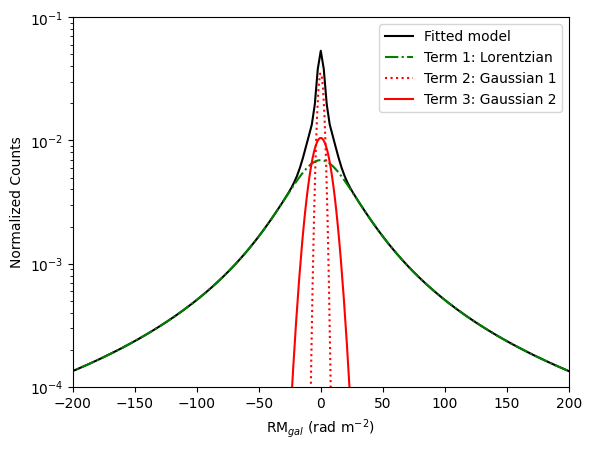

In [35]:
loaded_data = np.loadtxt("/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_2/BU_combined_2_10.txt")

x_data = loaded_data[:, 0] 
y_data = loaded_data[:, 1]  

def model_func(x, a1, m1, w1, a2, m2, w2, a3, m3, w3):
    term1 = a1 * (w1**2 / (w1**2 + (x - m1)**2))
    term2 = a2 * np.exp(-((x - m2) ** 2) / w2)
    term3 = a3 * np.exp(-((x - m3) ** 2) / w3)
    return term1 + term2 + term3

initial_guess = [0.0068,	0.0017,	28.8234,	0.0348,	-0.0001,	10.9635,	0.0104,	0.0037,	117.2199]  

popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)

a1, m1, w1, a2, m2, w2, a3, m3, w3 = popt
param_names = ["a1", "m1", "w1","a2", "m2", "w2", "a3", "m3", "w3"]
for name, value in zip(param_names, popt):
    print(f"{name} = {value:.4f}")

x_fit = np.linspace(-300, 300, 500)

y_term1 = popt[0] * (popt[2]**2 / (popt[2]**2 + (x_fit - popt[1])**2))
y_term2 = popt[3] * np.exp(-((x_fit - popt[4]) ** 2) / popt[5])
y_term3 = popt[6] * np.exp(-((x_fit - popt[7]) ** 2) / popt[8])
tot = y_term1+y_term2+y_term3

# plt.hist(sampled_data1, bins=bin_edges, density=True, histtype='step', color='b')
plt.plot(x_data, model_func(x_data, *popt), 'black', label='Fitted model')
plt.plot(x_fit, y_term1, 'g-.', label="Term 1: Lorentzian")
plt.plot(x_fit, y_term2, 'r:', label="Term 2: Gaussian 1")
plt.plot(x_fit, y_term3, 'r', label="Term 3: Gaussian 2")
plt.xlim(-200, 200)
plt.ylim(10**-4, 10**-1)
plt.yscale("log")
plt.legend()
plt.xlabel(r"RM$_{gal}$ (rad m$^{-2}$)")
plt.ylabel('Normalized Counts')
plt.show()

B0 = 2.0  
rho_B0 = 10.0
data_to_save = np.hstack(([B0], [rho_B0], popt))
column_names = ["B0", "rho_B0", "a1", "m1", "w1", "a2", "m2", "w2", "a3", "m3", "w3"]
filename = "/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_2/fitted_parameters.txt"
np.savetxt(filename, [data_to_save], fmt="%.4f", delimiter="\t", header="\t".join(column_names), comments='')


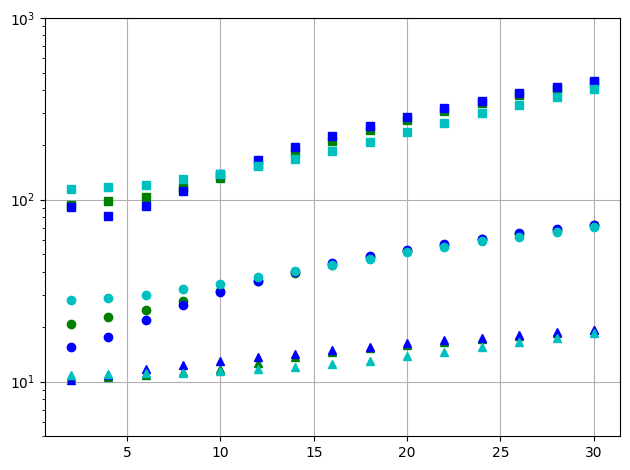

In [10]:
def extract_w_values(rho_value):
    i_values = list(range(2, 32, 2))
    w1_list, w2_list, w3_list = [], [], []

    for i in i_values:
        filename = f"/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_{rho_value}/B_{i}/fitted_parameters_2.txt"
        try:
            data = np.loadtxt(filename, delimiter="\t", skiprows=1)
            if data.ndim == 1:
                w1, w2, w3 = data[4], data[7], data[10]
            else:
                w1, w2, w3 = data[:, 4], data[:, 7], data[:, 10]
            w1_list.append(w1)
            w2_list.append(w2)
            w3_list.append(w3)
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            w1_list.append(np.nan)
            w2_list.append(np.nan)
            w3_list.append(np.nan)

    return i_values, np.array(w1_list), np.array(w2_list), np.array(w3_list)

i_vals_5, w1_5, w2_5, w3_5 = extract_w_values(5)
i_vals_2, w1_2, w2_2, w3_2 = extract_w_values(2)
i_vals_10, w1_10, w2_10, w3_10 = extract_w_values(10)

plt.plot(i_vals_5, w1_5, 'go')
plt.plot(i_vals_5, w2_5, 'g^')
plt.plot(i_vals_5, w3_5, 'gs')

plt.plot(i_vals_2, w1_2, 'bo')
plt.plot(i_vals_2, w2_2, 'b^')
plt.plot(i_vals_2, w3_2, 'bs')

plt.plot(i_vals_10, w1_10, 'co')
plt.plot(i_vals_10, w2_10, 'c^')
plt.plot(i_vals_10, w3_10, 'cs')

plt.yscale("log")
plt.ylim(5, 10**3)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitted parameters:
p0 = 16.9096
p1 = 1.5022
p2 = 0.0118


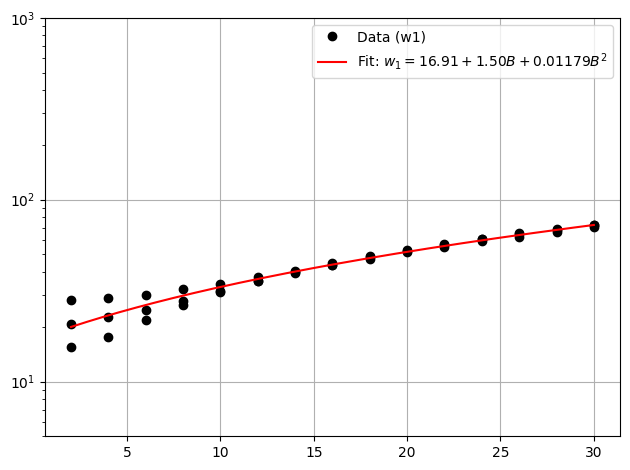

In [43]:
def extract_w_values(rho_value):
    i_values = list(range(2, 32, 2))
    w1_list, w2_list, w3_list = [], [], []

    for i in i_values:
        filename = f"/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_{rho_value}/B_{i}/fitted_parameters_2.txt"
        try:
            data = np.loadtxt(filename, delimiter="\t", skiprows=1)
            if data.ndim == 1:
                w1, w2, w3 = data[4], data[7], data[10]
            else:
                w1, w2, w3 = data[:, 4], data[:, 7], data[:, 10]
            w1_list.append(w1)
            w2_list.append(w2)
            w3_list.append(w3)
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            w1_list.append(np.nan)
            w2_list.append(np.nan)
            w3_list.append(np.nan)

    return i_values, np.array(w1_list), np.array(w2_list), np.array(w3_list)
    
i_vals_2, w1_2, _, _ = extract_w_values(2)
i_vals_5, w1_5, _, _ = extract_w_values(5)
i_vals_10, w1_10, _, _ = extract_w_values(10)

B_vals = np.array(i_vals_2 + i_vals_5 + i_vals_10)  
w1_vals = np.concatenate([w1_2, w1_5, w1_10])        

mask = ~np.isnan(w1_vals)
B_vals_clean = B_vals[mask]
w1_vals_clean = w1_vals[mask]

def quad_model(B, p0, p1, p2):
    return p0 + p1*B + p2*B**2


# lower_bounds = [12, 1.0, -1]
# upper_bounds = [17, 2.0, 1]
initial_guesses = [13.6, 1.8, -0.0076]  

popt, pcov = curve_fit(quad_model,B_vals_clean,w1_vals_clean,p0=initial_guesses)

p0, p1, p2 = popt
print(f"Fitted parameters:\np0 = {p0:.4f}\np1 = {p1:.4f}\np2 = {p2:.4f}")

B_fit = np.linspace(min(B_vals_clean), max(B_vals_clean), 200)
w1_fit = quad_model(B_fit, *popt)

plt.plot(B_vals_clean, w1_vals_clean, 'ko', label="Data (w1)")
plt.plot(B_fit, w1_fit, 'r-', label=f"Fit: $w_1 = {p0:.2f} + {p1:.2f}B + {p2:.5f}B^2$")
plt.ylim(5, 10**3)
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitted parameters with 1σ uncertainties:
a1 = 0.0068 ± 0.0016
m1 = 0.0019 ± 1.6722
w1 = 28.8221 ± 5.5836
a2 = 0.0348 ± 0.0019
m2 = -0.0001 ± 0.0785
w2 = 10.9634 ± 1.1502
a3 = 0.0104 ± 0.0018
m3 = 0.0036 ± 0.5824
w3 = 117.2095 ± 38.8286


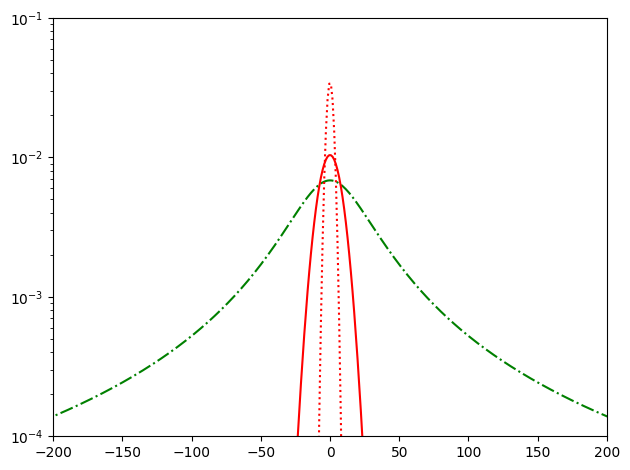

In [16]:
base_path = "/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_10/B_4"
data_path = f"{base_path}/BU_combined_4_10.txt"
param_path = f"{base_path}/fitted_parameters.txt"
error_save_path = f"{base_path}/fitted_errors.txt"

loaded_data = np.loadtxt(data_path)
x_data = loaded_data[:, 0]
y_data = loaded_data[:, 1]

def model_func(x, a1, m1, w1, a2, m2, w2, a3, m3, w3):
    term1 = a1 * (w1**2 / (w1**2 + (x - m1)**2))  
    term2 = a2 * np.exp(-((x - m2) ** 2) / w2)     
    term3 = a3 * np.exp(-((x - m3) ** 2) / w3)     
    return term1 + term2 + term3

full_data = np.loadtxt(param_path, skiprows=1)

if full_data.ndim == 1:
    full_params = full_data  
else:
    full_params = full_data[1]  

initial_guess = full_params[2:] 

popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

param_names = ["a1", "m1", "w1", "a2", "m2", "w2", "a3", "m3", "w3"]
print("Fitted parameters with 1σ uncertainties:")
for name, value, error in zip(param_names, popt, perr):
    print(f"{name} = {value:.4f} ± {error:.4f}")

x_fit = np.linspace(-300, 300, 500)
y_term1 = popt[0] * (popt[2]**2 / (popt[2]**2 + (x_fit - popt[1])**2))
y_term2 = popt[3] * np.exp(-((x_fit - popt[4]) ** 2) / popt[5])
y_term3 = popt[6] * np.exp(-((x_fit - popt[7]) ** 2) / popt[8])

# plt.plot(x_data, model_func(x_data, *popt), 'black', label='Fitted model')
plt.plot(x_fit, y_term1, 'g-.', label="Term 1: Lorentzian")
plt.plot(x_fit, y_term2, 'r:', label="Term 2: Gaussian 1")
plt.plot(x_fit, y_term3, 'r', label="Term 3: Gaussian 2")
plt.xlim(-200, 200)
plt.ylim(1e-4, 1e-1)
plt.yscale("log")
plt.tight_layout()
plt.show()

error_to_save = np.hstack((perr))
error_columns = [f"err_{p}" for p in param_names]
np.savetxt(error_save_path, [error_to_save], fmt="%.4f", delimiter="\t", header="\t".join(error_columns), comments='')



Processing i = 2


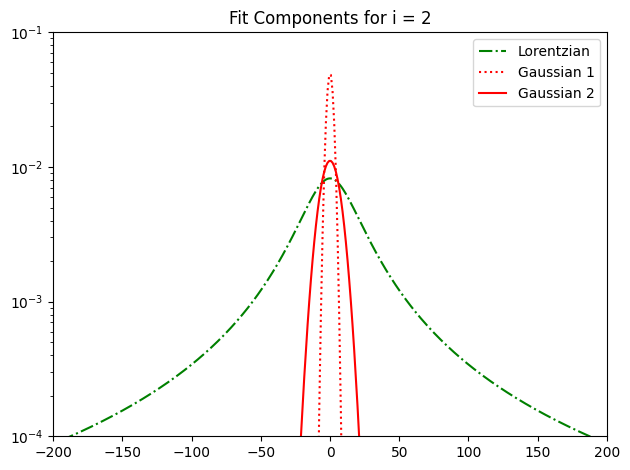


Processing i = 4


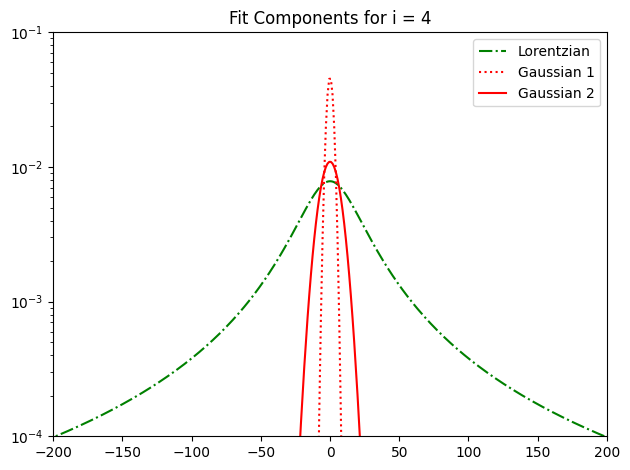


Processing i = 6


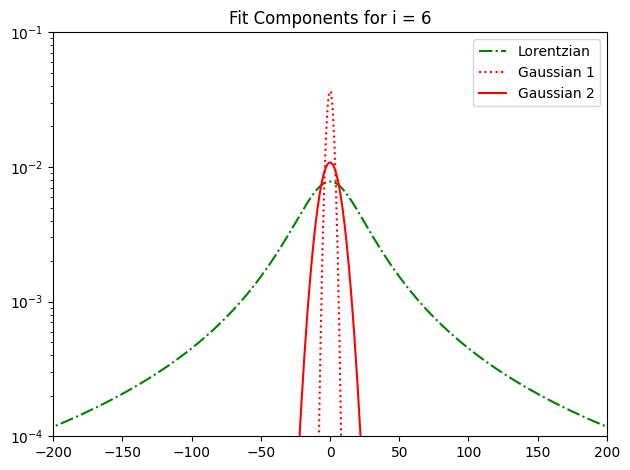


Processing i = 8


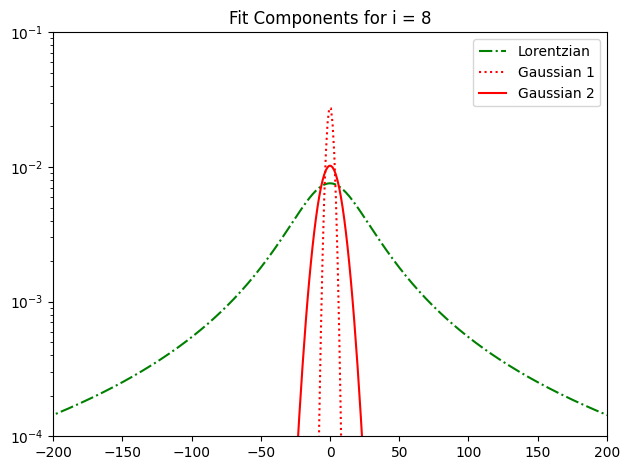


Processing i = 10


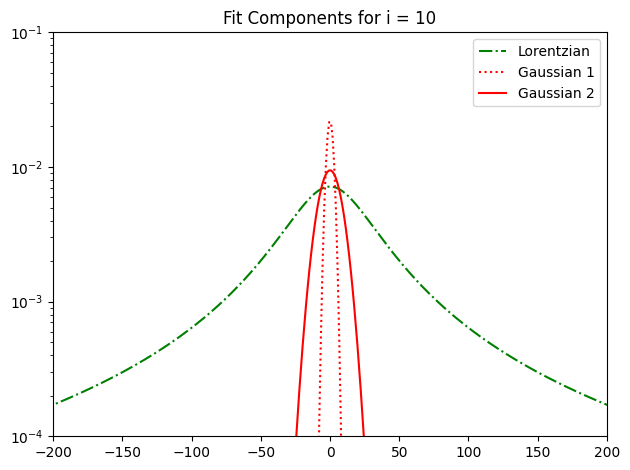


Processing i = 12


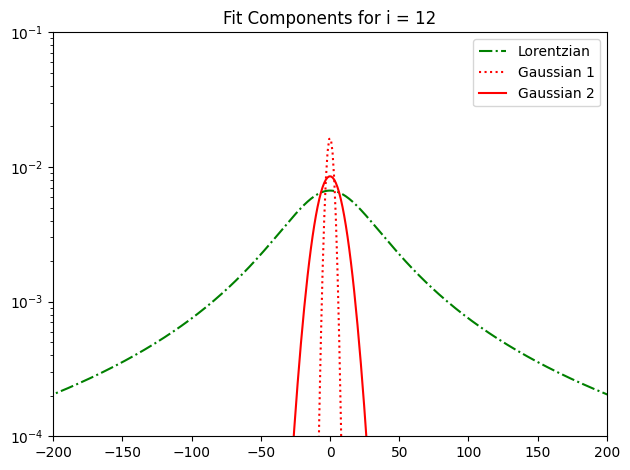


Processing i = 14


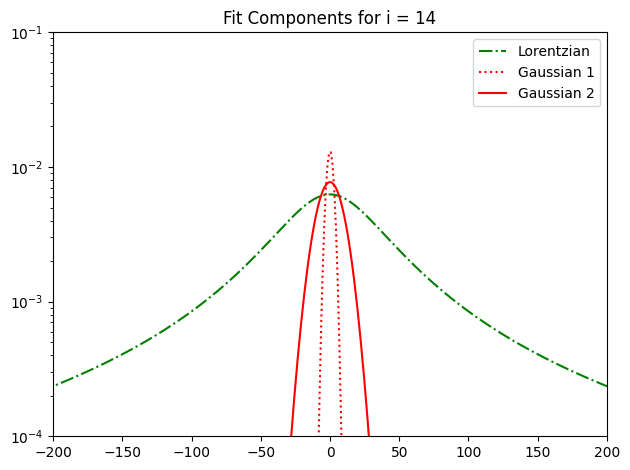


Processing i = 16


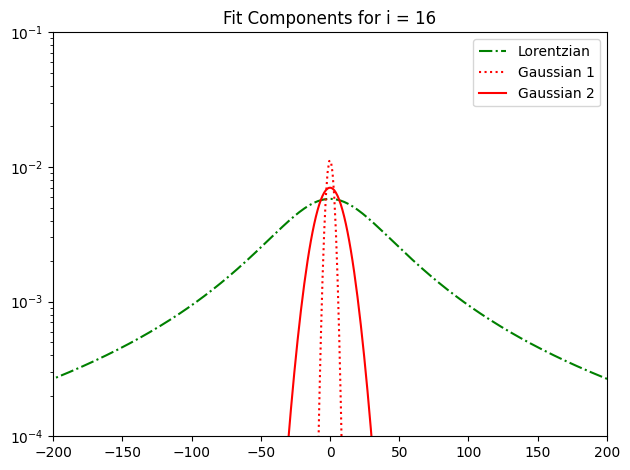


Processing i = 18


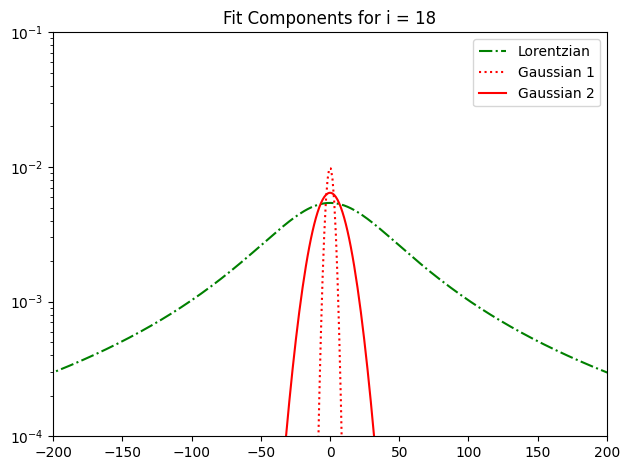


Processing i = 20


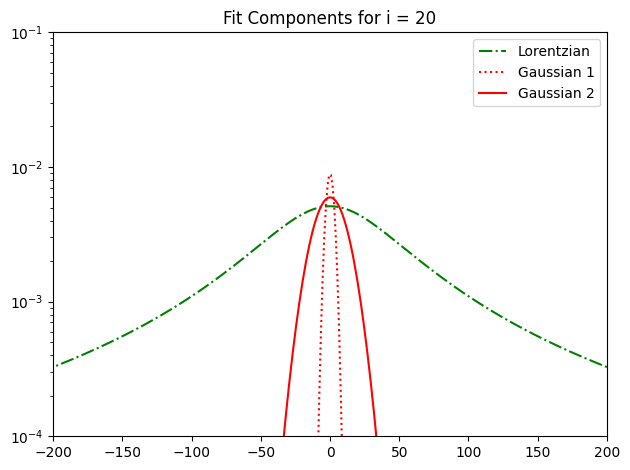


Processing i = 22


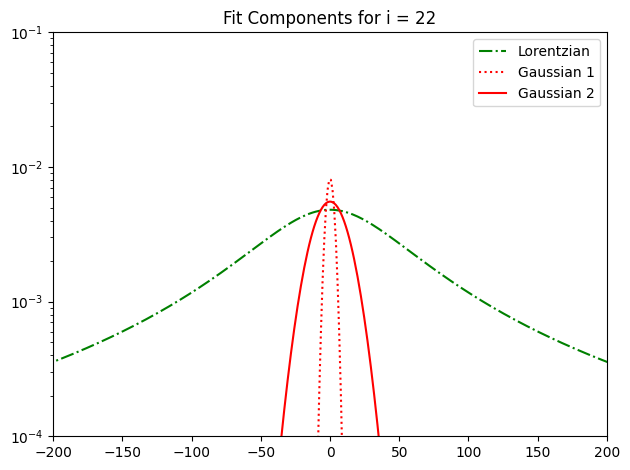


Processing i = 24


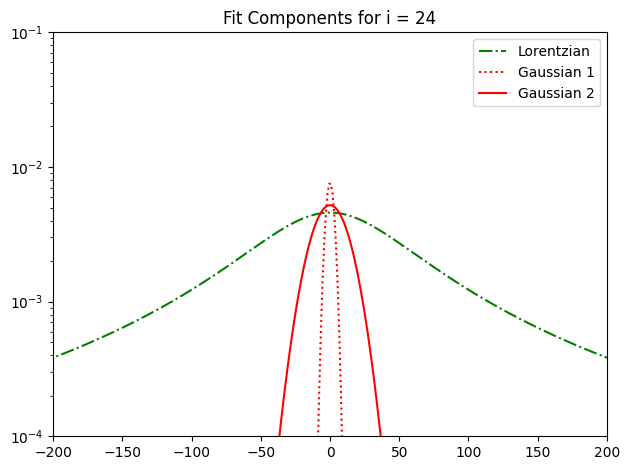


Processing i = 26


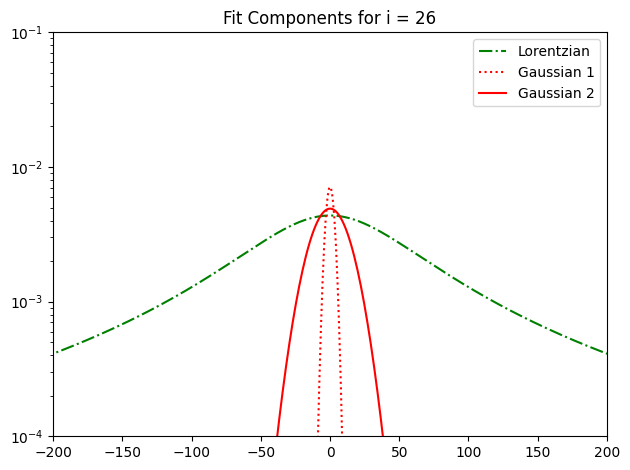


Processing i = 28


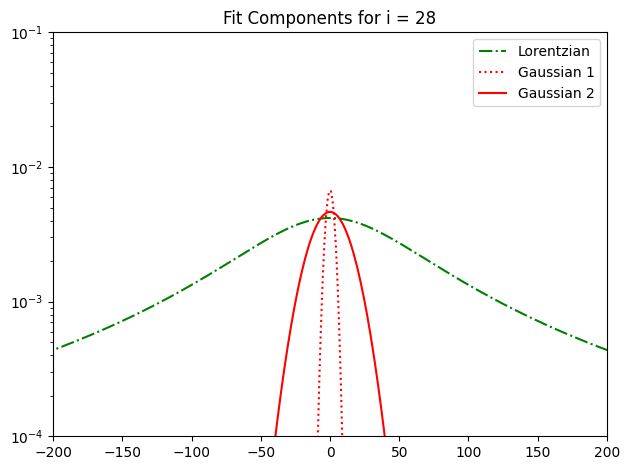


Processing i = 30


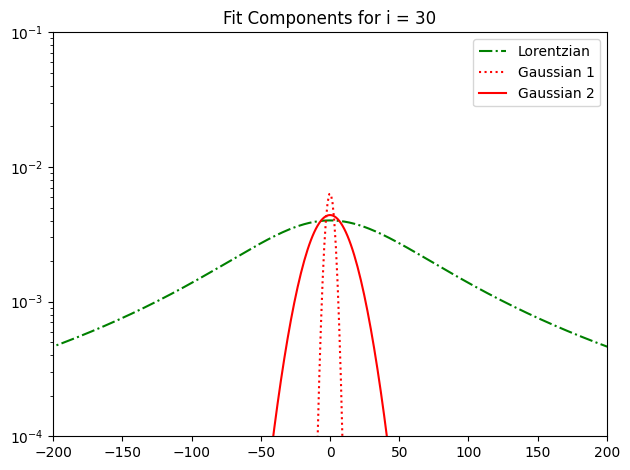

In [7]:
def model_func(x, a1, m1, w1, a2, m2, w2, a3, m3, w3):
    term1 = a1 * (w1**2 / (w1**2 + (x - m1)**2))  
    term2 = a2 * np.exp(-((x - m2) ** 2) / w2)     
    term3 = a3 * np.exp(-((x - m3) ** 2) / w3)     
    return term1 + term2 + term3

for i in range(2, 31, 2):
    print(f"\nProcessing i = {i}")
    
    base_path = f"/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_5/B_{i}"
    data_path = f"{base_path}/BU_combined_{i}_5.txt"
    param_path = f"{base_path}/fitted_parameters.txt"
    param_path2 = f"{base_path}/fitted_parameters_2.txt"
    error_save_path = f"{base_path}/fitted_errors.txt"
    
    try:
        loaded_data = np.loadtxt(data_path)
        x_data = loaded_data[:, 0]
        y_data = loaded_data[:, 1]

        full_data = np.loadtxt(param_path, skiprows=1)
        
        if full_data.ndim == 1:
            full_params = full_data
        else:
            full_params = full_data[i - 1]

        B0 = full_params[0]
        rho_B0 = full_params[1]
        initial_guess = full_params[2:]

        popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guess)
        perr = np.sqrt(np.diag(pcov))

        final_params = np.hstack(([B0], [rho_B0], popt))
        column_names = ["B0", "rho_B0", "a1", "m1", "w1", "a2", "m2", "w2", "a3", "m3", "w3"]
        np.savetxt(param_path2, [final_params], fmt="%.4f", delimiter="\t", header="\t".join(column_names), comments='')
        
        column_names = ["B0", "rho_B0", "a1", "m1", "w1", "a2", "m2", "w2", "a3", "m3", "w3"]
        error_columns = [f"err_{name}" for name in column_names[2:]]  
        np.savetxt(error_save_path, [perr], fmt="%.4f", delimiter="\t", header="\t".join(error_columns), comments='')

        x_fit = np.linspace(-300, 300, 500)
        y_term1 = popt[0] * (popt[2]**2 / (popt[2]**2 + (x_fit - popt[1])**2))
        y_term2 = popt[3] * np.exp(-((x_fit - popt[4]) ** 2) / popt[5])
        y_term3 = popt[6] * np.exp(-((x_fit - popt[7]) ** 2) / popt[8])
        
        plt.plot(x_fit, y_term1, 'g-.', label="Lorentzian")
        plt.plot(x_fit, y_term2, 'r:', label="Gaussian 1")
        plt.plot(x_fit, y_term3, 'r', label="Gaussian 2")
        plt.title(f"Fit Components for i = {i}")
        plt.xlim(-200, 200)
        plt.ylim(1e-4, 1e-1)
        plt.yscale("log")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in i = {i}: {e}")


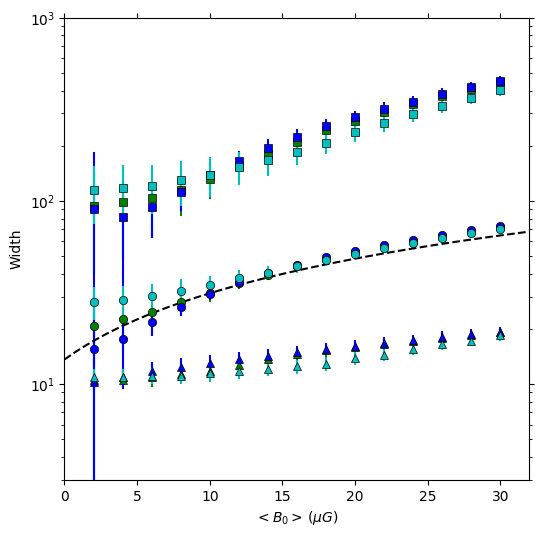

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def extract_w_values(rho_value):
    i_values = list(range(2, 32, 2))
    w1_list, w1_err = [], []
    w2_list, w2_err = [], []
    w3_list, w3_err = [], []

    for i in i_values:
        param_file = f"/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_{rho_value}/B_{i}/fitted_parameters_2.txt"
        error_file = f"/Users/hshishir/Desktop/MSc_THESIS/CODE/basu_test/rho_{rho_value}/B_{i}/fitted_errors.txt"
        try:
            param_data = np.loadtxt(param_file, delimiter="\t", skiprows=1)
            error_data = np.loadtxt(error_file, delimiter="\t", skiprows=1)

            if param_data.ndim == 1:
                w1, w2, w3 = param_data[4], param_data[7], param_data[10]
                e1, e2, e3 = error_data[2], error_data[5], error_data[8]
            else:
                w1, w2, w3 = param_data[:, 4], param_data[:, 7], param_data[:, 10]
                e1, e2, e3 = error_data[:, 2], error_data[:, 5], error_data[:, 8]

            w1_list.append(w1)
            w1_err.append(e1)
            w2_list.append(w2)
            w2_err.append(e2)
            w3_list.append(w3)
            w3_err.append(e3)
        except Exception as e:
            print(f"Error reading files for rho={rho_value}, B={i}: {e}")
            w1_list.append(np.nan)
            w1_err.append(np.nan)
            w2_list.append(np.nan)
            w2_err.append(np.nan)
            w3_list.append(np.nan)
            w3_err.append(np.nan)

    return i_values, np.array(w1_list), np.array(w1_err), np.array(w2_list), np.array(w2_err), np.array(w3_list), np.array(w3_err)

plt.figure(figsize=(6, 6))
B_fit = np.linspace(0,35)
w1_fit2 = 16.9096 + 1.5022*B_fit + 0.0118*B_fit**2 
w1_fit = 13.6 + 1.8*B_fit + (-0.0032)*B_fit**2 

i_vals_5, w1_5, err1_5, w2_5, err2_5, w3_5, err3_5 = extract_w_values(5)
i_vals_2, w1_2, err1_2, w2_2, err2_2, w3_2, err3_2 = extract_w_values(2)
i_vals_10, w1_10, err1_10, w2_10, err2_10, w3_10, err3_10 = extract_w_values(10)

plt.errorbar(i_vals_5, w1_5, yerr=err1_5, fmt='go', label='ρ=5, w1',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_5, w2_5, yerr=err2_5, fmt='g^', label='ρ=5, w2',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_5, w3_5, yerr=err3_5, fmt='gs', label='ρ=5, w3',markeredgecolor='black', markeredgewidth=0.5)

plt.errorbar(i_vals_2, w1_2, yerr=err1_2, fmt='bo', label='ρ=2, w1',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_2, w2_2, yerr=err2_2, fmt='b^', label='ρ=2, w2',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_2, w3_2, yerr=err3_2, fmt='bs', label='ρ=2, w3',markeredgecolor='black', markeredgewidth=0.5)

plt.errorbar(i_vals_10, w1_10, yerr=err1_10, fmt='co', label='ρ=10, w1',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_10, w2_10, yerr=err2_10, fmt='c^', label='ρ=10, w2',markeredgecolor='black', markeredgewidth=0.5)
plt.errorbar(i_vals_10, w3_10, yerr=err3_10, fmt='cs', label='ρ=10, w3',markeredgecolor='black', markeredgewidth=0.5)

plt.ylabel("Width")
plt.xlabel(r'$<B_{0}> \, (\mu G)$')
plt.plot(B_fit, w1_fit, '--', color='black')
# plt.plot(B_fit, w1_fit2, '--', color='red')
ax = plt.gca()
ax.set_yscale("log")
ax.set_xlim(0, 32)
ax.set_ylim(3, 10**3)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
ax.tick_params(top=True, which='major')
ax.tick_params(right=True, which='both')